In [1]:
# The dataset contains cases from a study that was conducted between 
# 1958 and 1970 at the University of Chicago's Billings Hospital on 
# the survival of patients who had undergone surgery for breast cancer.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman.csv")

In [3]:
print(haberman.shape)

(306, 4)


In [4]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
# Number of Instances: 306
# Number of Attributes: 4 (including the class attribute)

In [6]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
# Ref - https://www.kaggle.com/gilsousa/habermans-survival-data-set

# Attribute Information:

#   1. Age of patient at time of operation (numerical)
#   2. Patient's year of operation (year - 1900, numerical)
#   3. Number of positive axillary nodes detected (numerical)


#   4.Survival status (class attribute) 
#        1 = the patient survived 5 years or longer 
#        2 = the patient died within 5 year

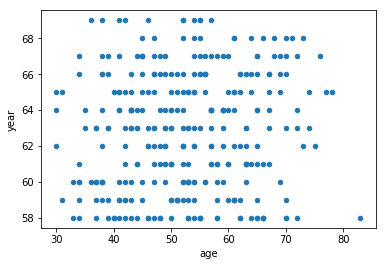

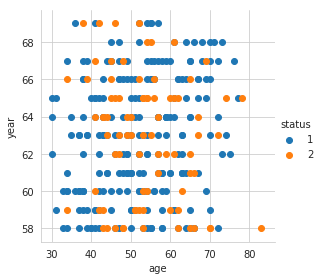

In [8]:
haberman.plot(kind='scatter', x='age', y='year') ;
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show()

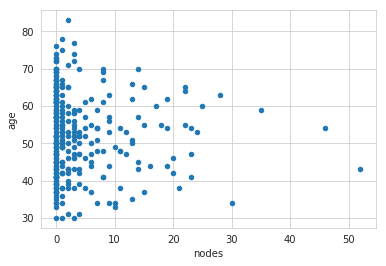

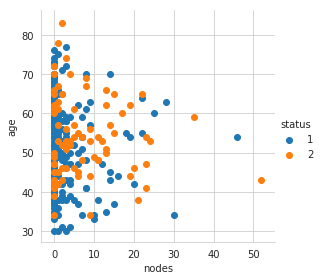

In [9]:
haberman.plot(kind='scatter', x='nodes', y='age') ;
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.show()

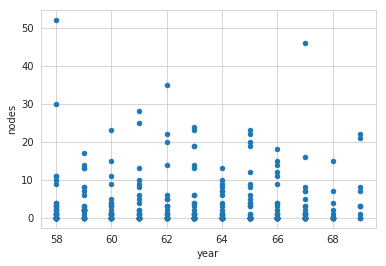

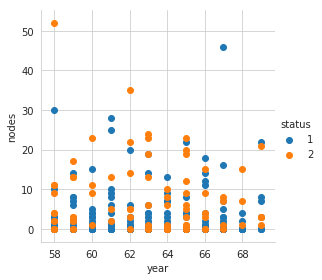

In [10]:
haberman.plot(kind='scatter', x='year', y='nodes') ;
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show()

In [11]:
# Observations From Scatter Plot
# 1. None of the features can be used to distinguish 
#    whether the patient has survived or not

In [12]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


/home/tarun/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tarun/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


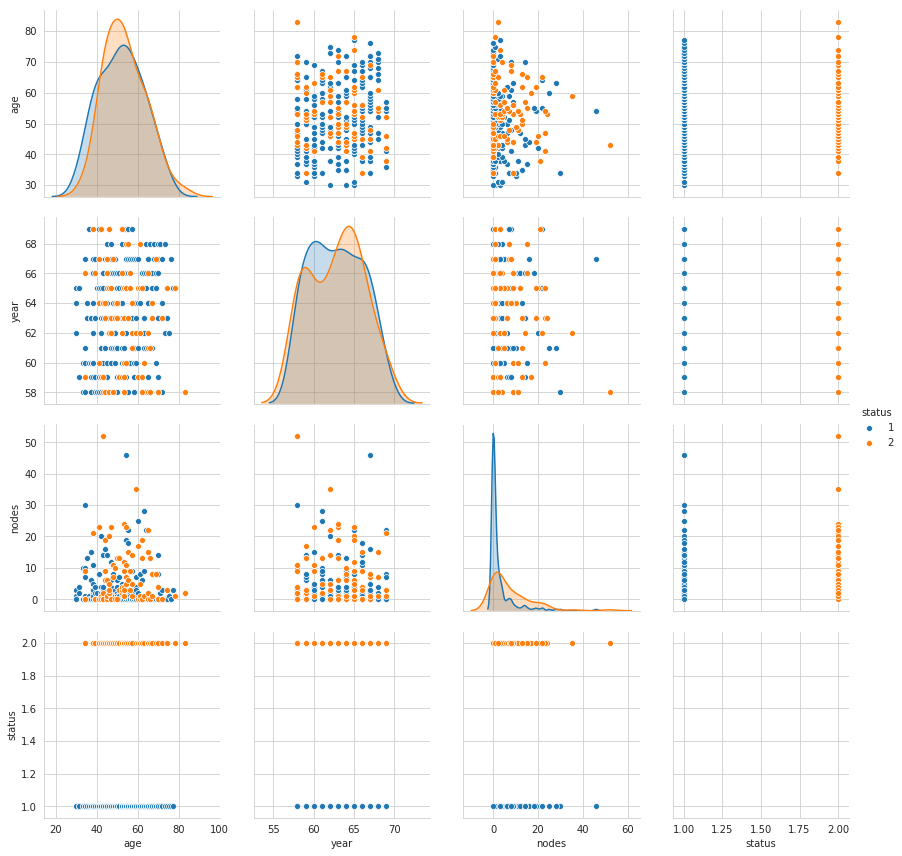

In [13]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height = 3);
plt.show()

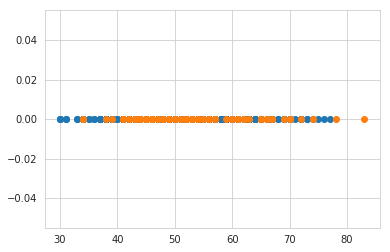

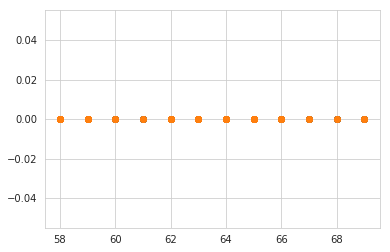

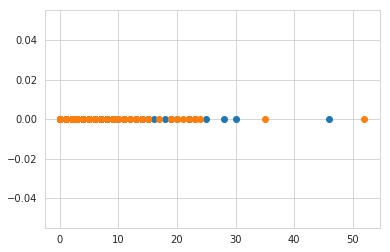

In [14]:
import numpy as np
haberman_one = haberman.loc[haberman["status"] == 1];
haberman_two = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_one["age"], np.zeros_like(haberman_one['age']), 'o')
plt.plot(haberman_two["age"], np.zeros_like(haberman_two['age']), 'o')
plt.show()

plt.plot(haberman_one["year"], np.zeros_like(haberman_one['year']), 'o')
plt.plot(haberman_two["year"], np.zeros_like(haberman_two['year']), 'o')
plt.show()

plt.plot(haberman_one["nodes"], np.zeros_like(haberman_one['nodes']), 'o')
plt.plot(haberman_two["nodes"], np.zeros_like(haberman_two['nodes']), 'o')
plt.show()

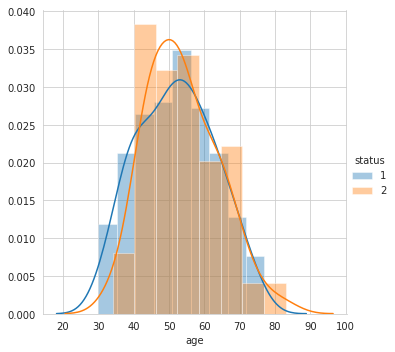

In [15]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

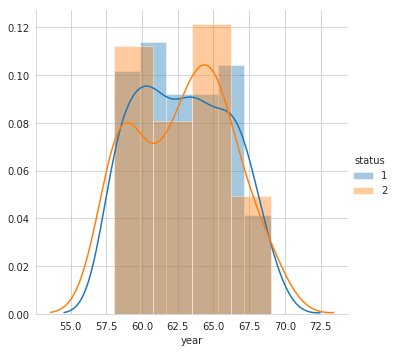

In [16]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

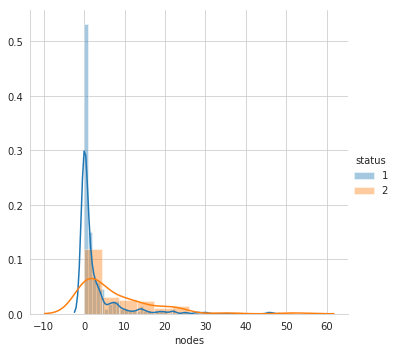

In [17]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


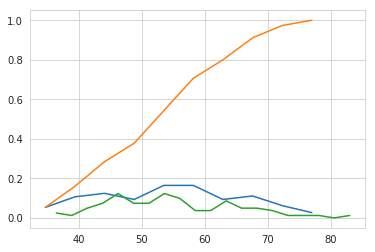

In [18]:
# CDF

counts, bin_edges = np.histogram(haberman_one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_two['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


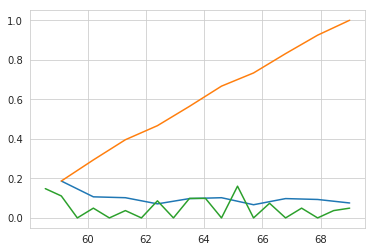

In [19]:
counts, bin_edges = np.histogram(haberman_one['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_two['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


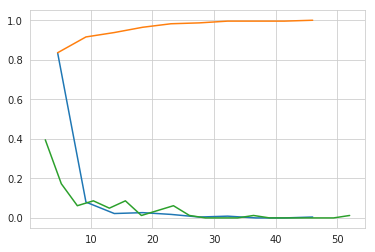

In [20]:
counts, bin_edges = np.histogram(haberman_one['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_two['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

In [21]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_one["age"]))
print(np.mean(haberman_two["age"]))

print(np.mean(haberman_one["year"]))
print(np.mean(haberman_two["year"]))

print(np.mean(haberman_one["nodes"]))
print(np.mean(haberman_two["nodes"]))

#Mean with an outlier.
print(np.mean(np.append(haberman_one["age"],50)));
print(np.mean(np.append(haberman_two["age"],50)));

print(np.mean(np.append(haberman_one["year"],50)));
print(np.mean(np.append(haberman_two["year"],50)));

print(np.mean(np.append(haberman_one["nodes"],50)));
print(np.mean(np.append(haberman_two["nodes"],50)));

print('------------')
# std-dev
print("\nStd-dev:");
print(np.std(haberman_one["age"]))
print(np.std(haberman_two["age"]))

print(np.std(haberman_one["year"]))
print(np.std(haberman_two["year"]))

print(np.std(haberman_one["nodes"]))
print(np.std(haberman_two["nodes"]))



Means:
52.01777777777778
53.67901234567901
62.86222222222222
62.82716049382716
2.7911111111111113
7.45679012345679
52.008849557522126
53.63414634146341
62.80530973451327
62.670731707317074
3.0
7.975609756097561
------------

Std-dev:
10.987655475100508
10.104182193031312
3.2157452144021947
3.3214236255207887
5.857258449412138
9.128776076761635


In [22]:
print("\nMedians:")
print(np.median(haberman_one["age"]))
print(np.median(haberman_two["age"]))

print(np.median(haberman_one["year"]))
print(np.median(haberman_two["year"]))

print(np.median(haberman_one["nodes"]))
print(np.median(haberman_two["nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_one["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_two["age"],np.arange(0, 100, 25)))

print(np.percentile(haberman_one["year"],np.arange(0, 100, 25)))
print(np.percentile(haberman_two["year"],np.arange(0, 100, 25)))

print(np.percentile(haberman_one["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_two["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_one["age"],90))
print(np.percentile(haberman_two["age"],90))

print(np.percentile(haberman_one["year"],90))
print(np.percentile(haberman_two["year"],90))

print(np.percentile(haberman_one["nodes"],90))
print(np.percentile(haberman_two["nodes"],90))



from statsmodels import robust
print ("\nMedian Absolute Deviation")

print(robust.mad(haberman_one["age"]))
print(robust.mad(haberman_two["age"]))

print(robust.mad(haberman_one["year"]))
print(robust.mad(haberman_two["year"]))

print(robust.mad(haberman_one["nodes"]))
print(robust.mad(haberman_two["nodes"]))


Medians:
52.0
53.0
63.0
63.0
0.0
4.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
67.0
67.0
67.0
67.0
8.0
20.0

Median Absolute Deviation
13.343419966550417
11.860817748044816
4.447806655516806
4.447806655516806
0.0
5.930408874022408


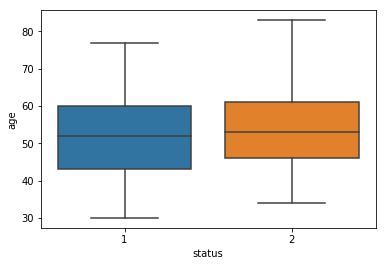

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

haberman = pd.read_csv("haberman.csv")
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

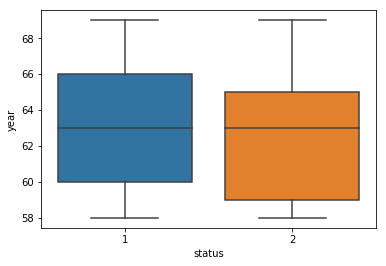

In [4]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

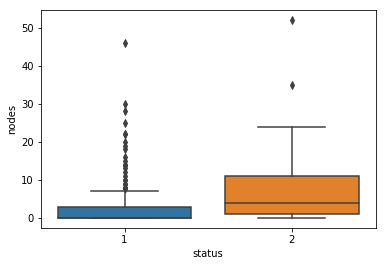

In [3]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

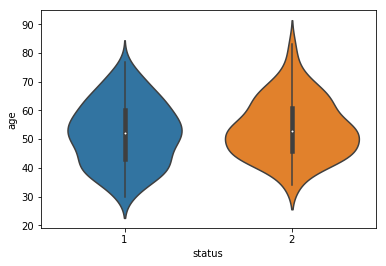

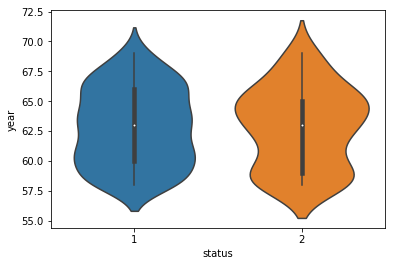

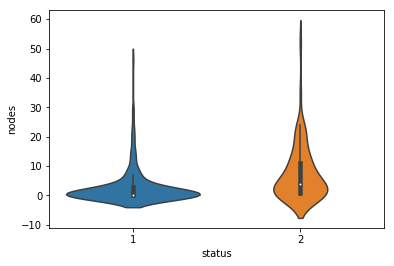

In [7]:
sns.violinplot(x='status',y='age', data=haberman,height=8)
plt.show()
sns.violinplot(x='status',y='year', data=haberman,height=8)
plt.show()
sns.violinplot(x='status',y='nodes', data=haberman,height=8)
plt.show()

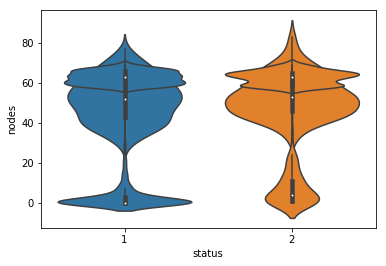

In [6]:
sns.violinplot(x='status',y='age', data=haberman,height=8)
sns.violinplot(x='status',y='year', data=haberman,height=8)

sns.violinplot(x='status',y='nodes', data=haberman,height=8)
plt.show()